#Extracting and cleaning

In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
wiki_df = first_table

In [4]:
wiki_df.head()

Symbol             Security  ...      CIK      Founded
0    MMM           3M Company  ...    66740         1902
1    ABT  Abbott Laboratories  ...     1800         1888
2   ABBV          AbbVie Inc.  ...  1551152  2013 (1888)
3   ABMD          ABIOMED Inc  ...   815094         1981
4    ACN        Accenture plc  ...  1467373         1989

[5 rows x 9 columns]

In [5]:
symb = wiki_df['Symbol'].tolist()
name = wiki_df['Security'].tolist()

comp_dict ={}
for s, n in zip(symb, name):
    comp_dict[s] = n

In [6]:
ds = '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2019/'

df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2019/A.csv')
df_close_2019 = df[['Date']]

import os

directory_in_str= '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2019'
directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        df = pd.read_csv(directory_in_str + '/' + filename)
        df_new = df[['Close']]
        df_close_2019[filename.split('.')[0]] = df_new
        
        continue
    else:
        continue

In [7]:
df_close_2019.shape

(252, 500)

In [8]:
df_close_2019 = df_close_2019.set_index('Date')
df_close_2019.head()

MMM        ABT       ABBV  ...         ZBH       ZION        ZTS
Date                                          ...                                  
2019-01-02  178.094437  67.305016  78.864014  ...  100.891823  38.978245  83.466866
2019-01-03  171.388519  64.128601  76.265549  ...   99.066940  38.762630  80.581871
2019-01-04  178.439545  65.958916  78.722588  ...  102.450378  39.953167  83.743507
2019-01-07  178.029175  66.946693  79.871574  ...  102.489838  40.112530  84.247383
2019-01-08  178.775299  66.142906  80.242790  ...  100.191460  40.478130  85.502151

[5 rows x 499 columns]

In [9]:
ds = '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/'

df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/A.csv')
df_close_2020 = df[['Date']]

import os

directory_in_str= '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020'
directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        df = pd.read_csv(directory_in_str + '/' + filename)
        df_new = df[['Close']]
        df_close_2020[filename.split('.')[0]] = df_new
        
        continue
    else:
        continue

In [10]:
df_close_2020.shape

(232, 504)

In [11]:
df_close_2020 = df_close_2020.set_index('Date')
df_close_2020.head()

MMM       ATVI  ...       ZION         ZTS
Date                               ...                       
2020-01-02  173.538239  58.266792  ...  50.530182  133.375900
2020-01-03  172.043884  58.286655  ...  49.817135  133.395782
2020-01-06  172.207794  59.349670  ...  49.210079  132.371658
2020-01-07  171.513626  59.945747  ...  48.911369  132.819077
2020-01-08  174.145645  59.488754  ...  49.393154  132.530716

[5 rows x 503 columns]

In [12]:
new_index_2019 = []
for i in df_close_2019.columns:
    new_index_2019.append(i + '_2019')

print(len(new_index_2019))

499


In [13]:
new_index_2020 = []
for i in df_close_2020.columns:
    new_index_2020.append(i + '_2020')

print(len(new_index_2020))

503


In [14]:
all_indices = new_index_2019 + new_index_2020
len(all_indices)

1002

In [15]:
df_close_2019.columns = new_index_2019
df_close_2019.head()

MMM_2019   ABT_2019  ABBV_2019  ...    ZBH_2019  ZION_2019   ZTS_2019
Date                                          ...                                  
2019-01-02  178.094437  67.305016  78.864014  ...  100.891823  38.978245  83.466866
2019-01-03  171.388519  64.128601  76.265549  ...   99.066940  38.762630  80.581871
2019-01-04  178.439545  65.958916  78.722588  ...  102.450378  39.953167  83.743507
2019-01-07  178.029175  66.946693  79.871574  ...  102.489838  40.112530  84.247383
2019-01-08  178.775299  66.142906  80.242790  ...  100.191460  40.478130  85.502151

[5 rows x 499 columns]

In [16]:
df_close_2020.columns = new_index_2020
df_close_2020.head()

MMM_2020  ATVI_2020  ...  ZION_2020    ZTS_2020
Date                               ...                       
2020-01-02  173.538239  58.266792  ...  50.530182  133.375900
2020-01-03  172.043884  58.286655  ...  49.817135  133.395782
2020-01-06  172.207794  59.349670  ...  49.210079  132.371658
2020-01-07  171.513626  59.945747  ...  48.911369  132.819077
2020-01-08  174.145645  59.488754  ...  49.393154  132.530716

[5 rows x 503 columns]

In [17]:
np_close_2020 = df_close_2020.to_numpy()
np_close_2020.shape

(232, 503)

In [18]:
np_close_2019 = df_close_2019.to_numpy()
np_close_2019.shape

(252, 499)

In [19]:
np_close_2019 = np_close_2019.T[:,:232]
np_close_2019.shape

(499, 232)

In [20]:
np_close_2020 = np_close_2020.T
np_close_2020.shape

(503, 232)

In [21]:
arr_close_2019 = np_close_2019.tolist()
arr_close_2020 = np_close_2020.tolist()

In [22]:
print(len(arr_close_2019))
print(len(arr_close_2020))

499
503


In [23]:
cleaned_movements_arr = []

for l in arr_close_2019:
    cleaned_movements_arr.append(l)

for l in arr_close_2020:
    cleaned_movements_arr.append(l)

cleaned_movements = np.array(cleaned_movements_arr)

In [24]:
cleaned_movements.shape

(1002, 232)

In [25]:
cleaned_movements = cleaned_movements.T
cleaned_movements.shape

(232, 1002)

In [26]:
df_movements = pd.DataFrame(cleaned_movements)
df_movements.shape

(232, 1002)

In [27]:
df_movements_cleaned = df_movements.fillna(df_movements.mean())

cleaned_movements = df_movements_cleaned.to_numpy()
cleaned_movements = cleaned_movements.astype('float64') 
cleaned_movements.shape

(232, 1002)

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(cleaned_movements.T)
X_scale = scaler.transform(cleaned_movements.T)
df_scale = pd.DataFrame(X_scale, columns=df_movements_cleaned.T.columns)
df_scale.head()

0         1         2    ...       229       230       231
0  0.068207  0.065639  0.068339  ...  0.062995  0.062685  0.062131
1  0.056323  0.053665  0.055197  ...  0.070373  0.070398  0.069624
2  0.073373  0.070956  0.073242  ...  0.077869  0.077340  0.076723
3  0.077822  0.075896  0.078695  ...  0.049408  0.049255  0.048261
4  0.050878  0.049141  0.051052  ...  0.073749  0.073716  0.073141

[5 rows x 232 columns]

In [29]:
df_scale.shape

(1002, 232)

# Clustering on the original data

Text(0, 0.5, 'Inertia')

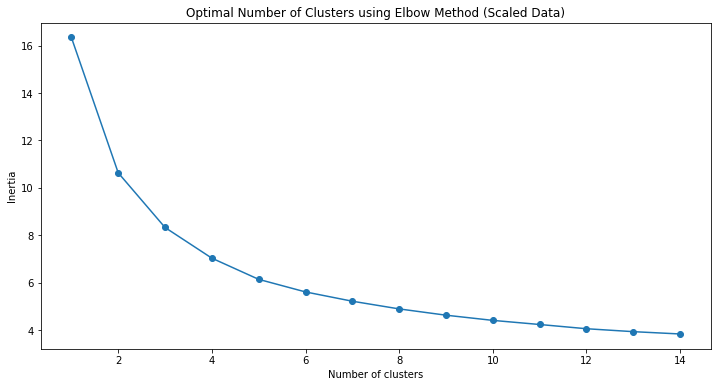

In [30]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [33]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.25502235352769315


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1002 samples in 0.025s...
[t-SNE] Computed neighbors for 1002 samples in 0.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1002
[t-SNE] Computed conditional probabilities for sample 1002 / 1002
[t-SNE] Mean sigma: 0.028540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.398323
[t-SNE] KL divergence after 2300 iterations: 0.708171


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



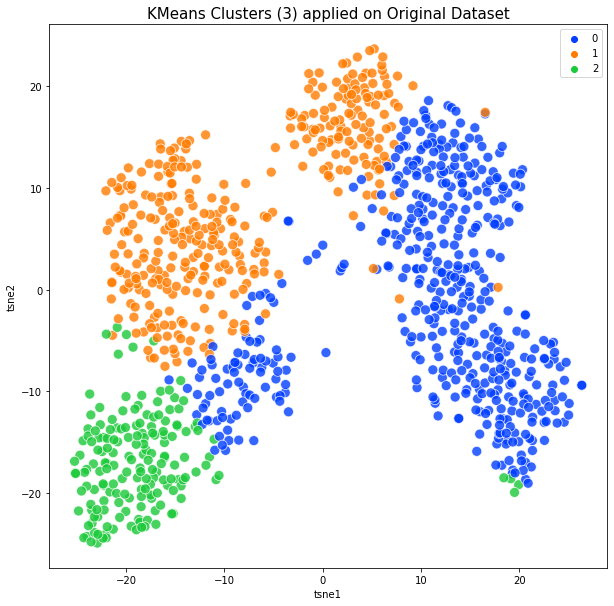

In [34]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale2)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
sns.scatterplot(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], 
                hue=labels_scale, 
                palette='bright',
                s=100, alpha=0.8).set_title('KMeans Clusters (3) applied on Original Dataset', fontsize=15)

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1002 samples in 0.019s...
[t-SNE] Computed neighbors for 1002 samples in 0.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1002
[t-SNE] Computed conditional probabilities for sample 1002 / 1002
[t-SNE] Mean sigma: 0.028540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.711258
[t-SNE] KL divergence after 1200 iterations: 0.573273


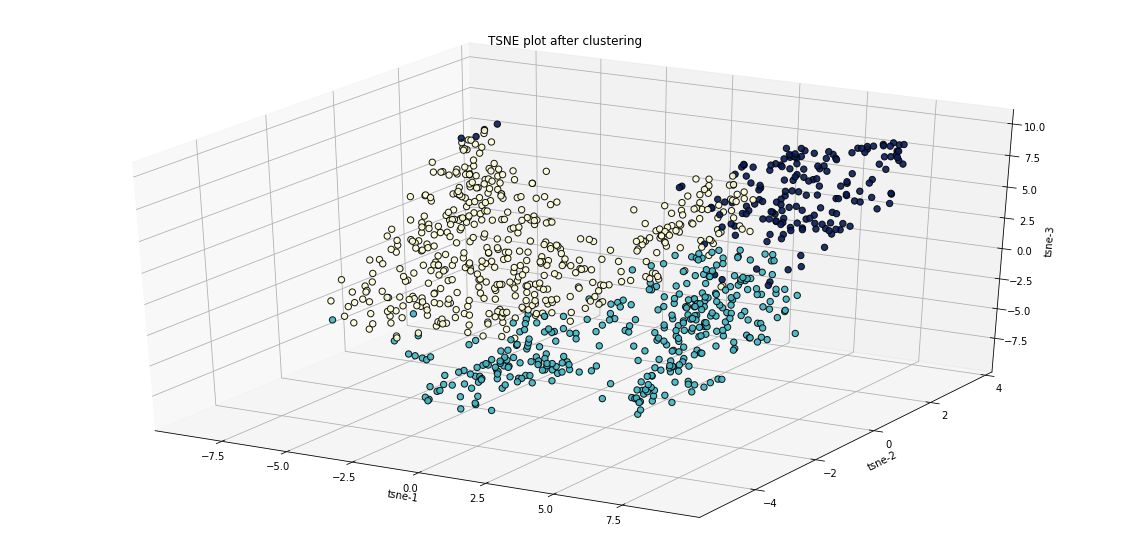

In [35]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale2)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_scale.iloc[:,0], tsne_df_scale.iloc[:,1], tsne_df_scale.iloc[:,2], 
            c=labels_scale, cmap='YlGnBu',
            edgecolor='k', s=40, alpha = 0.9)


ax.set_title("TSNE plot after clustering")
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")
ax.dist = 10

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

#Clustering by using PCA for feature reduction

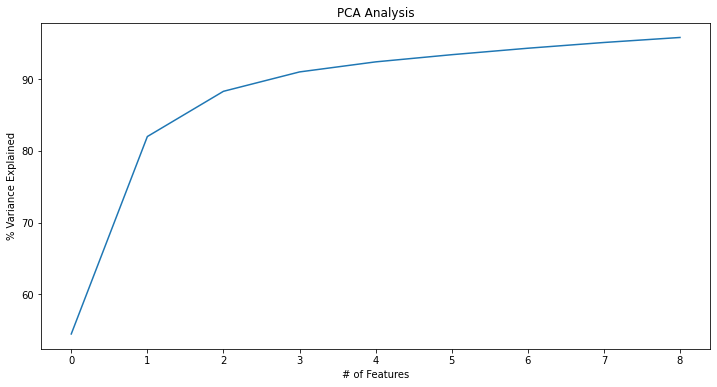

In [36]:
pca = PCA(n_components=0.95)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
# plt.ylim(0,100.5)
plt.plot(var)

In [37]:
num_comps = len(variance)

In [38]:
num_comps

9

In [39]:
pc_cols = []
for i in range(num_comps):
    pc_cols.append('pc'+str(i))

In [40]:
pca = PCA(n_components=num_comps)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=pc_cols)
print(pca.explained_variance_ratio_)

[0.54475681 0.27469385 0.06297868 0.02679619 0.01354177 0.01017854
 0.0087468  0.00797315 0.006702  ]


Applying KMeans to PCA reduced dataset

Text(0, 0.5, 'Inertia')

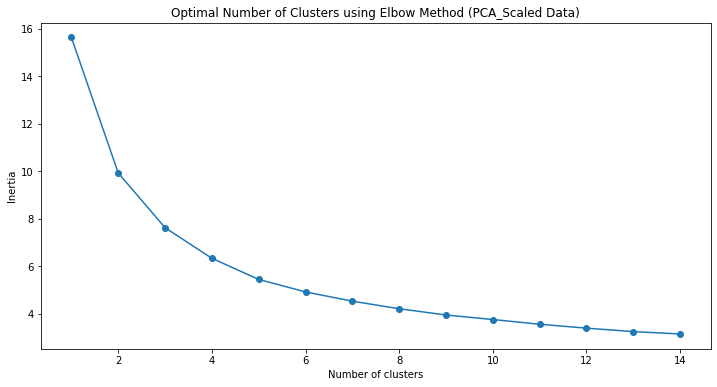

In [41]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [43]:
kmeans_pca_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))

labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.27469710942555414


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1002 samples in 0.001s...
[t-SNE] Computed neighbors for 1002 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1002
[t-SNE] Computed conditional probabilities for sample 1002 / 1002
[t-SNE] Mean sigma: 0.027260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.069466
[t-SNE] KL divergence after 3800 iterations: 0.702221


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



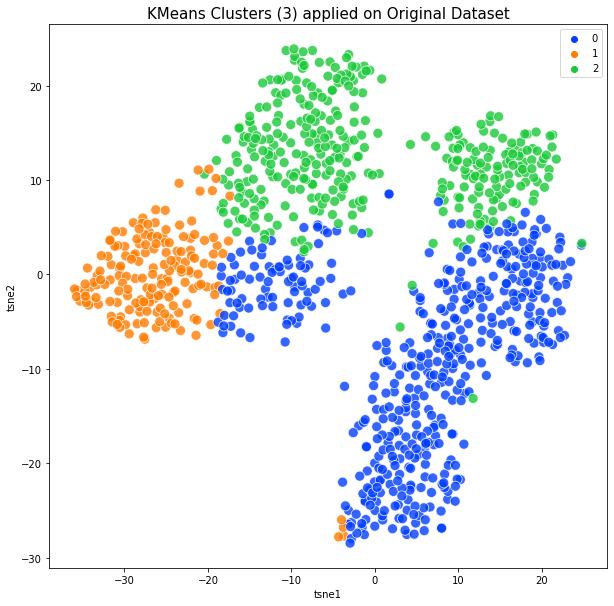

In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(pca_df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
sns.scatterplot(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], 
                hue=labels_pca_scale, 
                palette='bright',
                s=100, alpha=0.8).set_title('KMeans Clusters (3) applied on Original Dataset', fontsize=15)

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1002 samples in 0.002s...
[t-SNE] Computed neighbors for 1002 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1002
[t-SNE] Computed conditional probabilities for sample 1002 / 1002
[t-SNE] Mean sigma: 0.027260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.912178
[t-SNE] KL divergence after 750 iterations: 0.589055


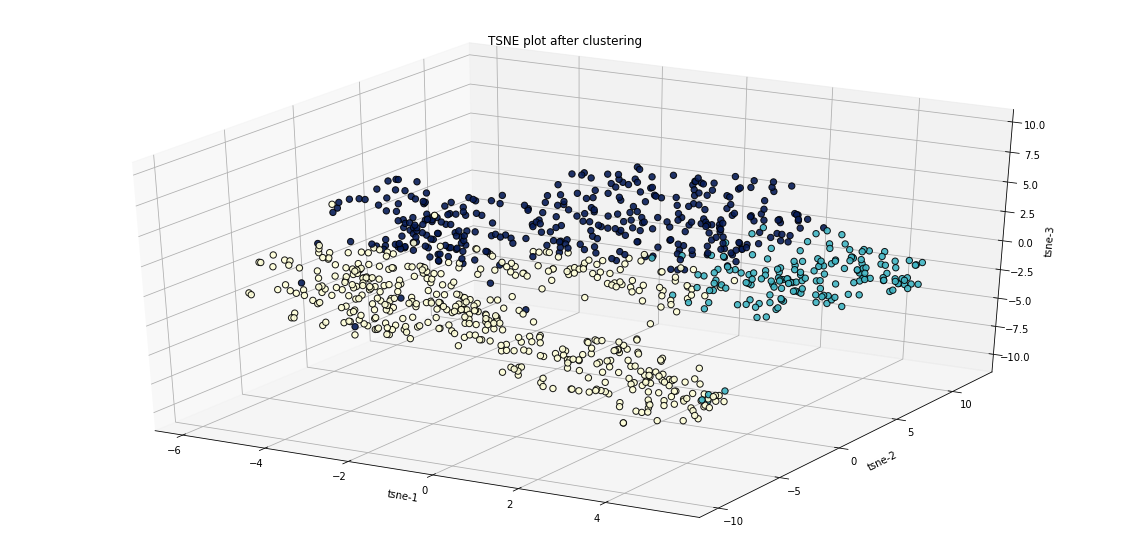

In [46]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(pca_df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_scale.iloc[:,0], tsne_df_scale.iloc[:,1], tsne_df_scale.iloc[:,2], 
            c=labels_pca_scale, cmap='YlGnBu',
            edgecolor='k', s=40, alpha = 0.9)


ax.set_title("TSNE plot after clustering")
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")
ax.dist = 10

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

#Processing results

In [47]:
clusters_pca_scale['Companies'] = all_indices
clusters_pca_scale = clusters_pca_scale.set_index('Companies')
clusters_pca_scale.head() 

pc0       pc1       pc2  ...       pc7       pc8  pca_clusters
Companies                                ...                                  
MMM_2019   0.040834 -0.112606 -0.042294  ...  0.006801 -0.003533             0
ABT_2019  -0.058506 -0.031895  0.009017  ... -0.005664 -0.006554             0
ABBV_2019  0.022812 -0.047619 -0.053182  ... -0.025362 -0.011658             0
ABMD_2019  0.164681 -0.176464 -0.004631  ...  0.003394 -0.004006             1
ACN_2019  -0.083924 -0.022297  0.013766  ... -0.006187  0.003530             0

[5 rows x 10 columns]

In [48]:
clusters_pca_scale.to_csv('/content/clusters_pca_scale_combined.csv')

In [49]:
companies_2019 = {'zero':[],
                  'one':[],
                  'two':[],
                  'three':[]}

companies_2020 = {'zero':[],
                  'one':[],
                  'two':[],
                  'three':[]}                  

In [50]:
comp_clusters = pd.DataFrame(clusters_pca_scale, columns=['pca_clusters'])
comp_clusters.shape

(1002, 1)

In [51]:
comp_clusters.head()

pca_clusters
Companies              
MMM_2019              0
ABT_2019              0
ABBV_2019             0
ABMD_2019             1
ACN_2019              0

In [52]:
comp_clusters['Index'] = [i for i in range(1002)]
comp_clusters = comp_clusters.set_index('Index')
comp_clusters.head()

pca_clusters
Index              
0                 0
1                 0
2                 0
3                 1
4                 0

In [53]:
comp_clusters['Companies'] = all_indices
comp_clusters.head()

pca_clusters  Companies
Index                         
0                 0   MMM_2019
1                 0   ABT_2019
2                 0  ABBV_2019
3                 1  ABMD_2019
4                 0   ACN_2019

In [54]:
for index, row in comp_clusters.iterrows():
    c, y = row['Companies'].split('_')[0], row['Companies'].split('_')[1]
    cluster = row['pca_clusters']
    
    if y=='2019':
        if cluster==0:
            companies_2019['zero'].append(c)
        elif cluster==1:
            companies_2019['one'].append(c)   
        elif cluster==2:
            companies_2019['two'].append(c)
        elif cluster==3:
            companies_2019['three'].append(c) 

    elif y=='2020':
        if cluster==0:
            companies_2020['zero'].append(c)
        elif cluster==1:
            companies_2020['one'].append(c)   
        elif cluster==2:
            companies_2020['two'].append(c)
        elif cluster==3:
            companies_2020['three'].append(c) 


In [55]:
print('Companies in 2019')
print('----------------------------------------------')
for key in companies_2019.keys():
    print(f'Companies in cluster {key} = {len(companies_2019[key])}')

print('Companies in 2020')
print('----------------------------------------------')
for key in companies_2020.keys():
    print(f'Companies in cluster {key} = {len(companies_2020[key])}')

Companies in 2019
----------------------------------------------
Companies in cluster zero = 373
Companies in cluster one = 6
Companies in cluster two = 120
Companies in cluster three = 0
Companies in 2020
----------------------------------------------
Companies in cluster zero = 105
Companies in cluster one = 166
Companies in cluster two = 232
Companies in cluster three = 0


In [56]:
clusters_pca_scale.index[:3]

Index(['MMM_2019', 'ABT_2019', 'ABBV_2019'], dtype='object', name='Companies')

In [57]:
df_movements.columns = all_indices

In [58]:
df_movements.head()

MMM_2019   ABT_2019  ABBV_2019  ...    ZBH_2020  ZION_2020    ZTS_2020
0  178.094437  67.305016  78.864014  ...  148.258896  50.530182  133.375900
1  171.388519  64.128601  76.265549  ...  147.871353  49.817135  133.395782
2  178.439545  65.958916  78.722588  ...  147.016785  49.210079  132.371658
3  178.029175  66.946693  79.871574  ...  146.887604  48.911369  132.819077
4  178.775299  66.142906  80.242790  ...  148.646439  49.393154  132.530716

[5 rows x 1002 columns]

In [64]:
filter_window = 5
def plot_curve_1(comp, year):
    yhat = savgol_filter(df_movements[comp + '_' + year], filter_window, 3)
    plt.figure(figsize=(6,4))
    plt.plot(yhat)
    plt.xlabel('Days')
    plt.ylabel('Closing price(USD)')
    plt.title('Closing prices of ' + comp_dict[comp])
    plt.grid()
    return

In [65]:
from scipy.signal import savgol_filter
filter_window = 7
def plot_curve_2(comp):
    comp_2019 = comp +'_2019'
    comp_2020 = comp +'_2020'

    fig = plt.figure(figsize = (11,3))
    plt.rcParams.update({'font.size': 8})
    ax1 = fig.add_subplot(1,2,1)

    plt.rcdefaults()
    plt.rcParams.update({'font.size': 8})
    yhat = savgol_filter(df_movements[comp_2019], filter_window, 3)
    ax1.plot(yhat)
    ax1.set_xlabel('Days(232)')
    ax1.set_ylabel('Closing value in USD')
    ax1.set_title(f'{comp_dict[comp]} in 2019')
    ax1.grid()

    ax2 = fig.add_subplot(1,2,2)
    plt.rcdefaults()
    plt.rcParams.update({'font.size': 8})
    yhat = savgol_filter(df_movements[comp_2020], filter_window, 3)
    ax2.plot(yhat)
    ax2.set_xlabel('Days(232)')
    ax2.set_ylabel('Closing value in USD')
    ax2.set_title(f'{comp_dict[comp]} in 2020')
    ax2.grid()

    return

# Defining cluster characteristics 

<h2>Characteristics of cluster zero -

* <b>Marginal increase or decrease</b> in closing values
* Closing value <b>remains approximately at the same level</b> irrespective of the recession in March 2020

In [67]:
print(companies_2019['zero'])

['MMM', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'APTV', 'ADM', 'ANET', 'AJG', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BAC', 'BK', 'BAX', 'BDX', 'BBY', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'COG', 'CDNS', 'COF', 'CAH', 'CCL', 'CAT', 'CBRE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CVX', 'CB', 'CHD', 'CI', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'CTVA', 'CCI', 'CSX', 'CMI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'EBAY', 'ECL', 'EA', 'EMR', 'EOG', 'ESS', 'ETSY', 'EVRG', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAS

In [69]:
print(companies_2020['zero'])

['ABBV', 'AKAM', 'ARE', 'LNT', 'MO', 'ANTM', 'AON', 'AEP', 'AEE', 'AMT', 'ANET', 'ABC', 'ATO', 'ADP', 'AMGN', 'BAX', 'BDX', 'BIIB', 'BSX', 'BMY', 'COG', 'CPB', 'CAH', 'CNC', 'CERN', 'CI', 'CSCO', 'CTXS', 'CME', 'CMS', 'KO', 'ED', 'COO', 'CCI', 'CVS', 'DLR', 'D', 'DUK', 'ECL', 'EVRG', 'ES', 'FFIV', 'FIS', 'FISV', 'FTNT', 'GIS', 'GILD', 'GPN', 'HSIC', 'HSY', 'HRL', 'ILMN', 'INCY', 'INTC', 'IBM', 'IFF', 'IRM', 'JKHY', 'SJM', 'JNJ', 'JNPR', 'K', 'KEYS', 'KMB', 'KR', 'LHX', 'LDOS', 'LLY', 'LMT', 'LUMN', 'MCK', 'MDT', 'MRK', 'MU', 'MAA', 'MDLZ', 'MSI', 'NI', 'NOC', 'NLOK', 'NRG', 'ORCL', 'OTIS', 'PEP', 'PRGO', 'PFE', 'PM', 'PNW', 'PSA', 'SBAC', 'STX', 'SO', 'TDY', 'TFX', 'TIF', 'TJX', 'VRSN', 'VZ', 'VRTX', 'VNT', 'WM', 'WAT', 'WEC', 'WLTW', 'XEL']


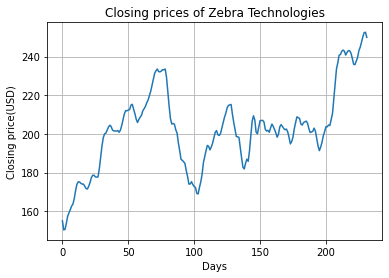

In [102]:
plot_curve_1('ZBRA', '2019')

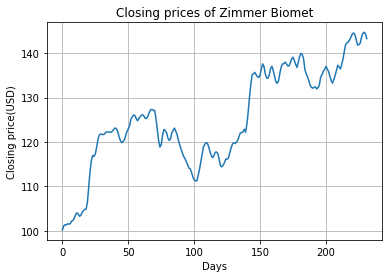

In [103]:
plot_curve_1('ZBH', '2019')

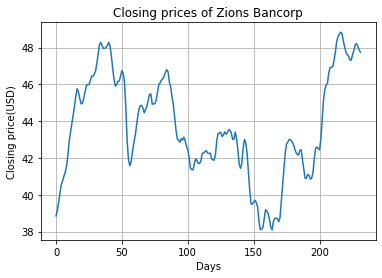

In [107]:
plot_curve_1('ZION', '2019')

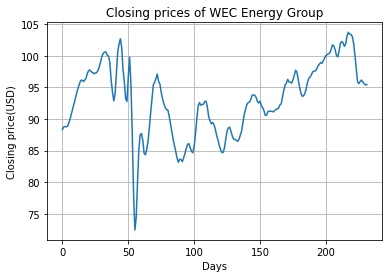

In [108]:
plot_curve_1('WEC', '2020')

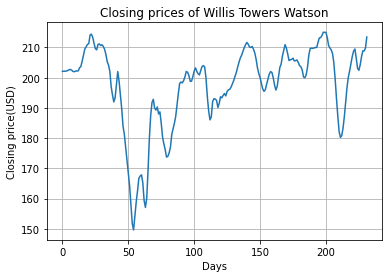

In [109]:
plot_curve_1('WLTW', '2020')

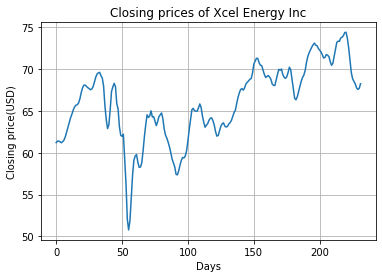

In [111]:
plot_curve_1('XEL', '2020')

<h2>Characteristics of cluster one -

* <b>Severe decrease</b> in closing values
* <b>Recovering intensity is very mild</b> after March 2020 recession  

In [79]:
print(companies_2019['one'])

['ABMD', 'BIIB', 'KHC', 'MOS', 'VTRS', 'WBA']


In [80]:
print(companies_2020['one'])

['AFL', 'ALK', 'ALLE', 'ALL', 'APA', 'AAL', 'AIV', 'AIG', 'AXP', 'T', 'AVB', 'BKR', 'BAC', 'BK', 'BA', 'BXP', 'COF', 'CCL', 'CBOE', 'CBRE', 'CNP', 'CF', 'SCHW', 'CVX', 'CB', 'CINF', 'C', 'CFG', 'CMA', 'CXO', 'COP', 'DRI', 'DAL', 'XRAY', 'DVN', 'FANG', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DXC', 'EIX', 'ETR', 'EOG', 'EQR', 'ESS', 'RE', 'EXC', 'EXPE', 'XOM', 'FRT', 'FITB', 'FE', 'FLT', 'FLIR', 'FLS', 'F', 'FOXA', 'FOX', 'BEN', 'IT', 'GD', 'GE', 'GL', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HES', 'HPE', 'HLT', 'HFC', 'HST', 'HWM', 'HPQ', 'HBAN', 'HII', 'IPG', 'IVZ', 'JPM', 'KEY', 'KIM', 'KMI', 'LW', 'LVS', 'LEG', 'LNC', 'LYV', 'L', 'LYB', 'MTB', 'MRO', 'MPC', 'MAR', 'MLM', 'MET', 'MGM', 'MHK', 'TAP', 'MOS', 'NOV', 'NTAP', 'NLSN', 'NTRS', 'NCLH', 'OXY', 'OMC', 'OKE', 'PBCT', 'PSX', 'PXD', 'PNC', 'PPL', 'PFG', 'PRU', 'PVH', 'RL', 'RJF', 'RTX', 'O', 'REG', 'RF', 'ROST', 'RCL', 'SLB', 'SRE', 'SPG', 'SLG', 'LUV', 'STT', 'SYF', 'SYY', 'TPR', 'FTI', 'TXT', 'TDG', 'TRV', 'TFC', 'TSN', 'UDR', 'ULTA

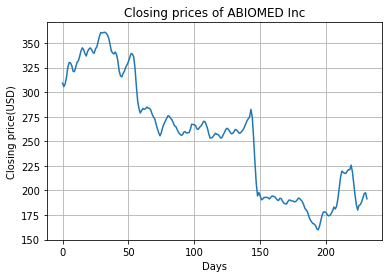

In [82]:
plot_curve_1('ABMD', '2019')

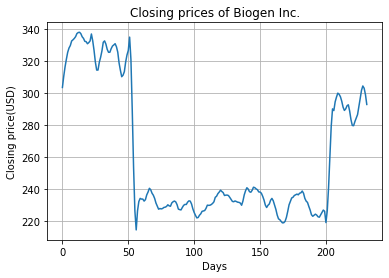

In [88]:
plot_curve_1('BIIB', '2019')

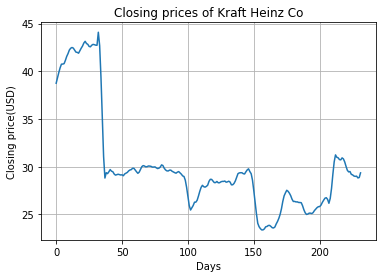

In [84]:
plot_curve_1('KHC', '2019')

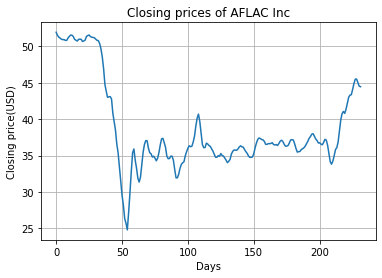

In [86]:
plot_curve_1('AFL', '2020')

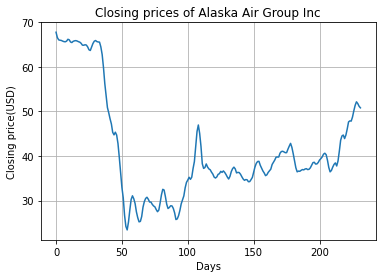

In [87]:
plot_curve_1('ALK', '2020')

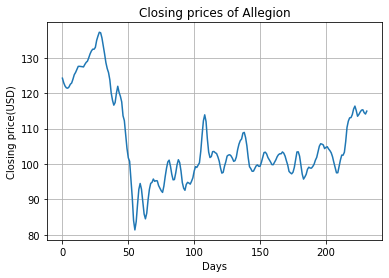

In [89]:
plot_curve_1('ALLE', '2020')

<h2>Characteristics of cluster two -

* <b>Severe increase</b> in closing values
* <b>Excellent recovery intensity</b> from the recession in March 2020

In [90]:
print(companies_2019['two'])

['ATVI', 'AMD', 'APD', 'AKAM', 'AIG', 'AMT', 'AWK', 'ANSS', 'AAPL', 'AMAT', 'AIZ', 'T', 'BLL', 'BIO', 'CPB', 'KMX', 'CTLT', 'CBOE', 'CDW', 'CE', 'CHTR', 'CMG', 'CINF', 'CTAS', 'CME', 'CMS', 'KO', 'CPRT', 'COST', 'CVS', 'DHI', 'DXCM', 'DG', 'ETN', 'EIX', 'EW', 'ETR', 'EFX', 'EQIX', 'EQR', 'EL', 'ES', 'FIS', 'FE', 'FISV', 'FLT', 'FMC', 'FBHS', 'GPN', 'HIG', 'HAS', 'PEAK', 'HSY', 'HD', 'HWM', 'IDXX', 'INFO', 'ICE', 'J', 'JCI', 'KSU', 'KEYS', 'KIM', 'KLAC', 'LHX', 'LRCX', 'LDOS', 'LMT', 'MKTX', 'MLM', 'MA', 'MCK', 'MDT', 'MSFT', 'MAA', 'MCO', 'MSI', 'MSCI', 'NWL', 'NEM', 'NEE', 'NOC', 'NVR', 'ODFL', 'PAYC', 'PSX', 'POOL', 'PG', 'PLD', 'PHM', 'QRVO', 'QCOM', 'RMD', 'ROST', 'SPGI', 'SBAC', 'STX', 'SRE', 'SHW', 'SO', 'SBUX', 'STE', 'SNPS', 'TTWO', 'TGT', 'TDY', 'TFX', 'TER', 'TDG', 'TYL', 'TSN', 'VMC', 'WRB', 'WMT', 'WEC', 'WELL', 'WST', 'WDC', 'WU', 'ZTS']


In [91]:
print(companies_2020['two'])

['MMM', 'ATVI', 'ACN', 'ABT', 'ABMD', 'ADBE', 'AAP', 'AMD', 'AES', 'A', 'APD', 'ALXN', 'ALB', 'ALGN', 'GOOG', 'GOOGL', 'AOS', 'AMCR', 'AMZN', 'AAPL', 'AMAT', 'APTV', 'AWK', 'ADM', 'AJG', 'AMP', 'AME', 'AIZ', 'ADSK', 'APH', 'ANSS', 'ADI', 'AZO', 'AVY', 'BLL', 'BBY', 'BIO', 'BLK', 'BKNG', 'BWA', 'AVGO', 'BR', 'CHRW', 'CDNS', 'KMX', 'CARR', 'CTLT', 'CAT', 'CDW', 'CE', 'CHTR', 'CMG', 'CHD', 'CTAS', 'CLX', 'CTSH', 'CL', 'CMCSA', 'CAG', 'STZ', 'CPRT', 'GLW', 'CTVA', 'COST', 'CSX', 'CMI', 'DHI', 'DHR', 'DVA', 'DE', 'DXCM', 'DG', 'DLTR', 'DPZ', 'DOV', 'DOW', 'DTE', 'DRE', 'DD', 'EMN', 'ETN', 'EBAY', 'EW', 'EA', 'EMR', 'EFX', 'EQIX', 'EL', 'ETSY', 'EXPD', 'EXR', 'FB', 'FAST', 'FDX', 'FRC', 'FMC', 'FTV', 'FBHS', 'FCX', 'GPS', 'GRMN', 'GM', 'GPC', 'GWW', 'HBI', 'HOLX', 'HD', 'HON', 'HUM', 'IEX', 'IDXX', 'INFO', 'ITW', 'IR', 'ICE', 'IP', 'INTU', 'ISRG', 'IPGP', 'IQV', 'J', 'JBHT', 'JCI', 'KSU', 'KLAC', 'KHC', 'LB', 'LH', 'LRCX', 'LEN', 'LIN', 'LKQ', 'LOW', 'MKTX', 'MMC', 'MAS', 'MA', 'MKC', 'MXIM'

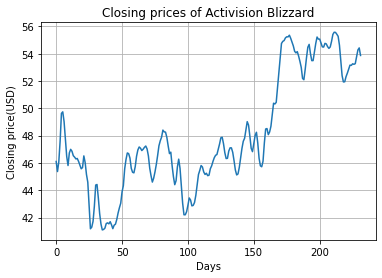

In [93]:
plot_curve_1('ATVI', '2019')

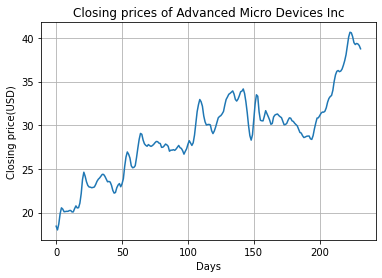

In [96]:
plot_curve_1('AMD', '2019')

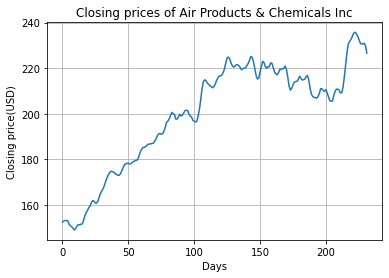

In [97]:
plot_curve_1('APD', '2019')

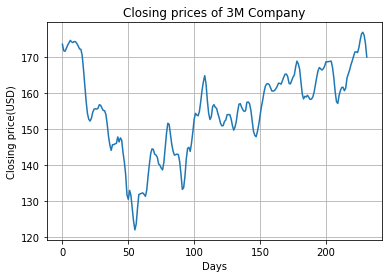

In [98]:
plot_curve_1('MMM', '2020')

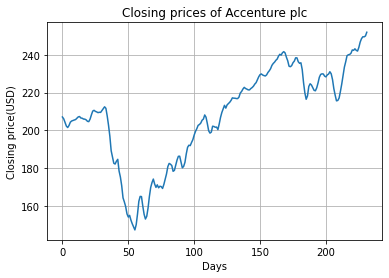

In [99]:
plot_curve_1('ACN', '2020')

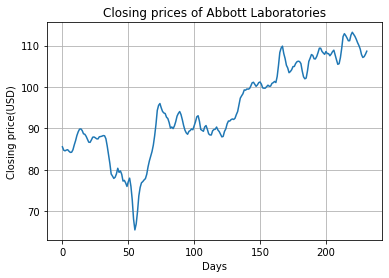

In [100]:
plot_curve_1('ABT', '2020')

#Analysing the cluster transition

In [117]:
comp_clusters.head()

pca_clusters  Companies
Index                         
0                 0   MMM_2019
1                 0   ABT_2019
2                 0  ABBV_2019
3                 1  ABMD_2019
4                 0   ACN_2019

In [118]:
cluster_transition = {}

for index, row in comp_clusters.iterrows():
    c, y = row['Companies'].split('_')[0], row['Companies'].split('_')[1]
    cluster = row['pca_clusters']
    cluster_transition[c] = []

In [121]:
for index, row in comp_clusters.iterrows():
    c, y = row['Companies'].split('_')[0], row['Companies'].split('_')[1]
    cluster = row['pca_clusters']
    cluster_transition[c].append(cluster)

In [124]:
all_transitions = {'0 to 1':[],
                   '0 to 2':[],
                   '1 to 0':[],
                   '1 to 2':[],
                   '2 to 0':[],
                   '2 to 1':[]}

In [128]:
all_transitions = {'0 to 1':[],
                   '0 to 2':[],
                   '1 to 0':[],
                   '1 to 2':[],
                   '2 to 0':[],
                   '2 to 1':[],
                   '0 to 0':[],
                   '1 to 1':[],
                   '2 to 2':[]}

for key in cluster_transition.keys():
    if len(cluster_transition[key])==2:
        c_2019, c_2020 = cluster_transition[key]
        if c_2019==0 and c_2020==1:
            all_transitions['0 to 1'].append(key)

        elif c_2019==0 and c_2020==2:
            all_transitions['0 to 2'].append(key)    

        elif c_2019==1 and c_2020==0:
            all_transitions['1 to 0'].append(key)

        elif c_2019==1 and c_2020==2:
            all_transitions['1 to 2'].append(key)  

        elif c_2019==2 and c_2020==0:
            all_transitions['2 to 0'].append(key)

        elif c_2019==2 and c_2020==1:
            all_transitions['2 to 1'].append(key)

        elif c_2019==0 and c_2020==0:
            all_transitions['0 to 0'].append(key)    

        elif c_2019==1 and c_2020==1:
            all_transitions['1 to 1'].append(key)

        elif c_2019==2 and c_2020==2:
            all_transitions['2 to 2'].append(key)    
            

#Companies that did not change their behaviour

<h3>Cluster Zero

* Cluster zero is associated to <b>marginal increase or decrease</b> in closing values. 

* <b> 74 Companies</b> that were in classified under cluster zero in 2019 continued to remain in the same cluster in 2020. 

* These companies had <b>low-medium increase/decrease in 2019</b> and these companies <b>were able to bounce back</b> to their previous closing price levels after getting hit my the recession in March 2020. 





In [133]:
print(len(all_transitions['0 to 0']))

74


In [137]:
print(all_transitions['0 to 0'])

['ABBV', 'ARE', 'LNT', 'MO', 'AEE', 'AEP', 'ABC', 'AMGN', 'ANTM', 'AON', 'ANET', 'ATO', 'ADP', 'BAX', 'BDX', 'BSX', 'BMY', 'COG', 'CAH', 'CNC', 'CERN', 'CI', 'CSCO', 'CTXS', 'ED', 'COO', 'CCI', 'DLR', 'D', 'DUK', 'ECL', 'EVRG', 'FFIV', 'FTNT', 'GIS', 'GILD', 'HSIC', 'HRL', 'ILMN', 'INCY', 'INTC', 'IBM', 'IFF', 'IRM', 'JKHY', 'SJM', 'JNJ', 'JNPR', 'K', 'KMB', 'KR', 'LLY', 'MRK', 'MU', 'MDLZ', 'NI', 'NLOK', 'NRG', 'ORCL', 'PEP', 'PRGO', 'PFE', 'PM', 'PNW', 'PSA', 'TIF', 'TJX', 'VRSN', 'VZ', 'VRTX', 'WM', 'WAT', 'WLTW', 'XEL']


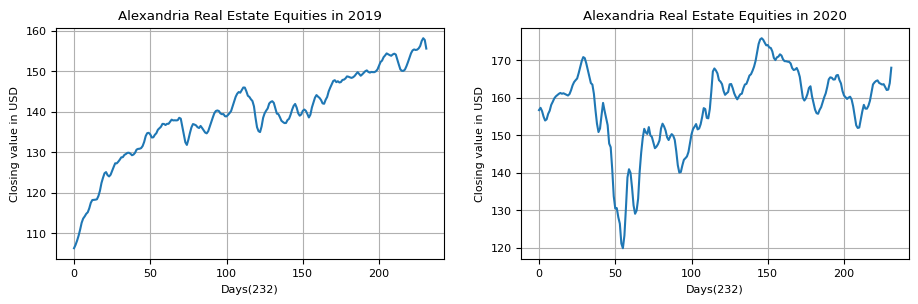

In [140]:
plot_curve_2('ARE')

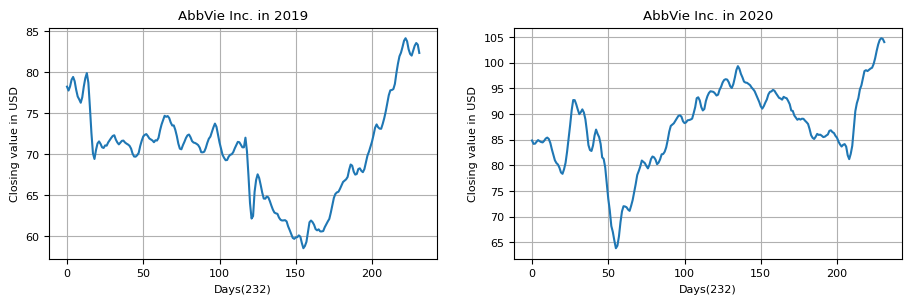

In [141]:
plot_curve_2('ABBV')

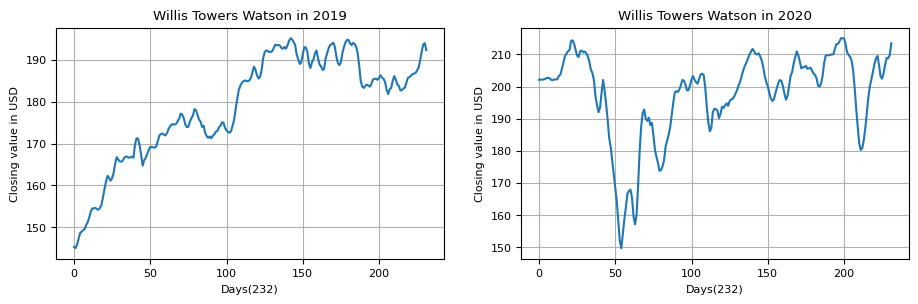

In [143]:
plot_curve_2('WLTW')

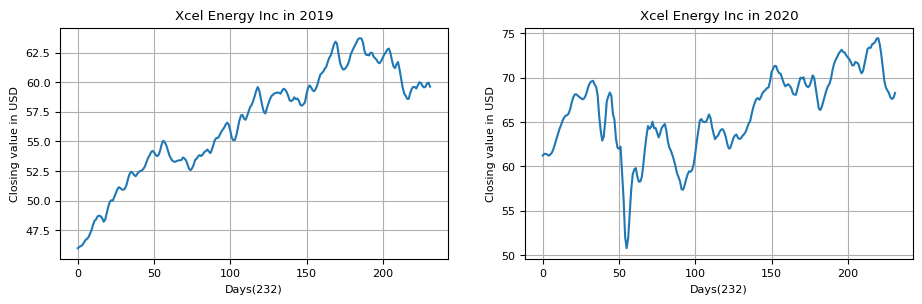

In [144]:
plot_curve_2('XEL')

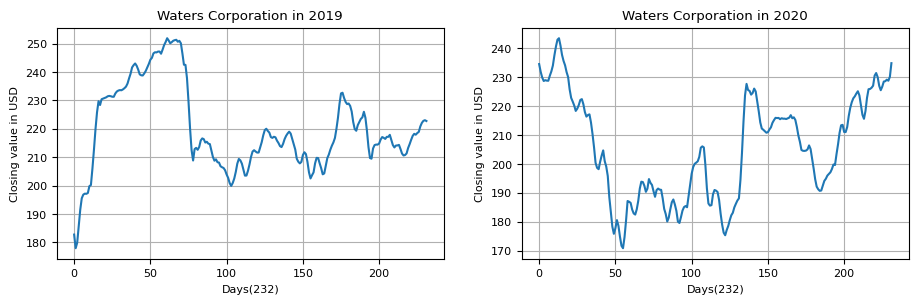

In [154]:
plot_curve_2('WAT')

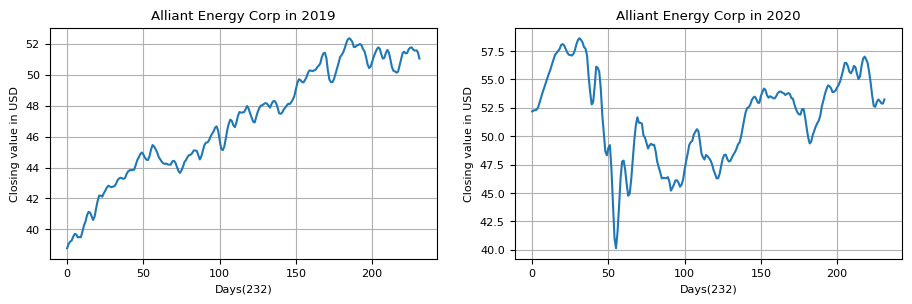

In [156]:
plot_curve_2('LNT')

<h3>Cluster One

* Cluster one is associated with a <b>severe decrease in closing values and a mild recovery intensity</b> after the recession in March 2020.

* Only <b> 3 Companies</b> that were in classified under cluster one in 2019 continued to remain in the same cluster in 2020.

* These companies <b>were not able to bounce back</b> to their previous closing prices and continue to under perform in the stock market.


In [134]:
print(len(all_transitions['1 to 1']))

3


In [145]:
print(all_transitions['1 to 1'])

['MOS', 'VTRS', 'WBA']


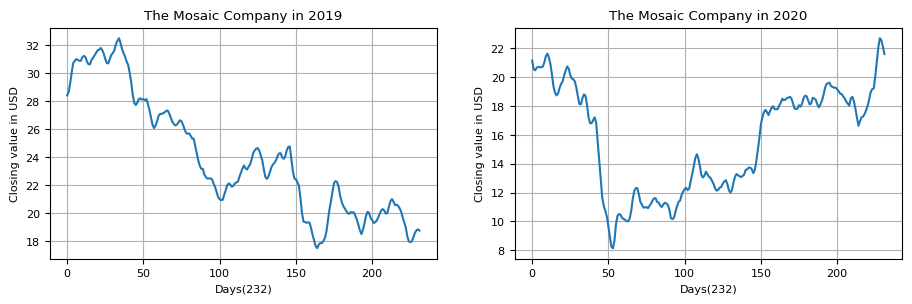

In [146]:
plot_curve_2('MOS')

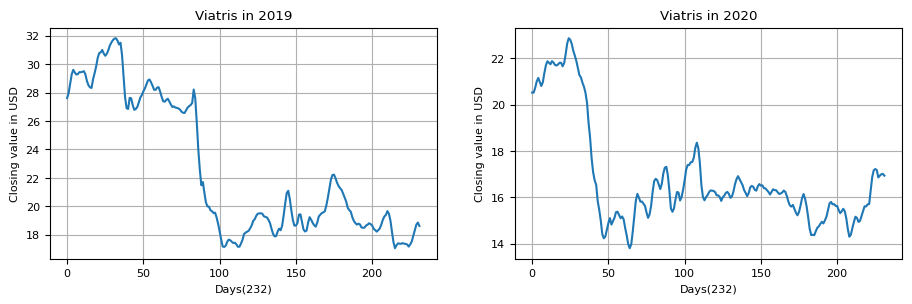

In [147]:
plot_curve_2('VTRS')

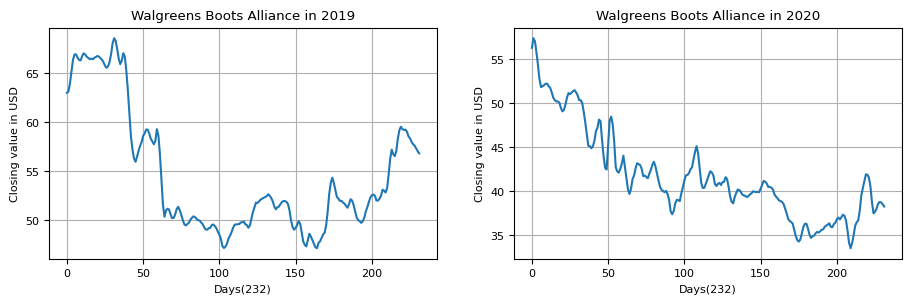

In [148]:
plot_curve_2('WBA')

<h3>Cluster Two

* Cluster two is associated with a <b>severe increase in closing values and a strong recovery intensity</b> after the recession in March 2020.

* <b> 69 Companies</b> that were in classified under cluster two in 2019 continued to remain in the same cluster in 2020.

* These companies <b>performed well</b> both before COVID and after COVID

In [135]:
print(len(all_transitions['2 to 2']))

69


In [149]:
print(all_transitions['2 to 2'])

['ATVI', 'AMD', 'APD', 'AWK', 'ANSS', 'AAPL', 'AMAT', 'AIZ', 'BLL', 'BIO', 'KMX', 'CTLT', 'CDW', 'CE', 'CHTR', 'CMG', 'CTAS', 'CPRT', 'COST', 'DHI', 'DXCM', 'DG', 'ETN', 'EW', 'EFX', 'EQIX', 'EL', 'FMC', 'FBHS', 'HD', 'IDXX', 'INFO', 'ICE', 'J', 'JCI', 'KSU', 'KLAC', 'LRCX', 'MKTX', 'MA', 'MSFT', 'MCO', 'MSCI', 'NWL', 'NEM', 'NEE', 'NVR', 'ODFL', 'PAYC', 'POOL', 'PG', 'PLD', 'PHM', 'QRVO', 'QCOM', 'RMD', 'SPGI', 'SHW', 'SBUX', 'STE', 'SNPS', 'TTWO', 'TGT', 'TER', 'TYL', 'VMC', 'WMT', 'WST', 'ZTS']


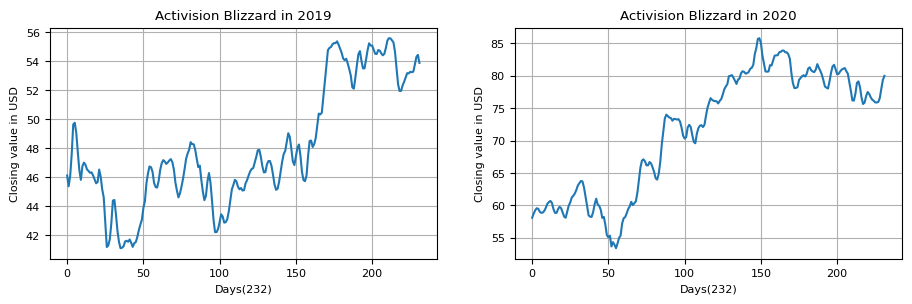

In [150]:
plot_curve_2('ATVI')

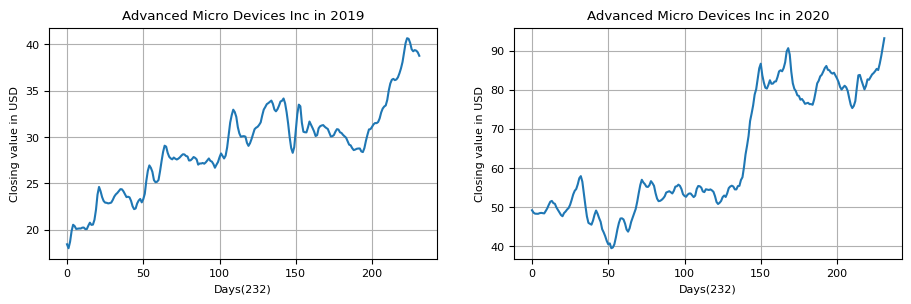

In [151]:
plot_curve_2('AMD')

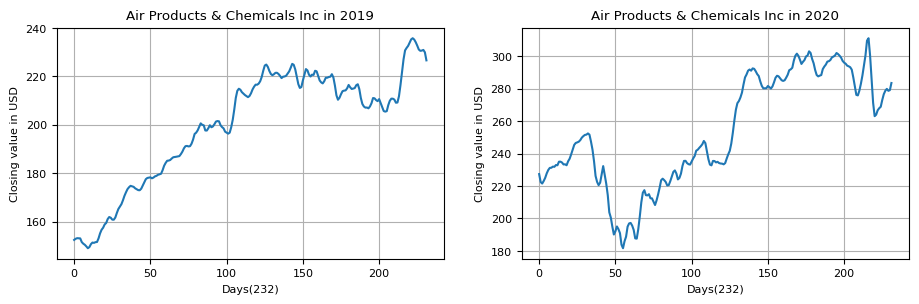

In [157]:
plot_curve_2('APD')

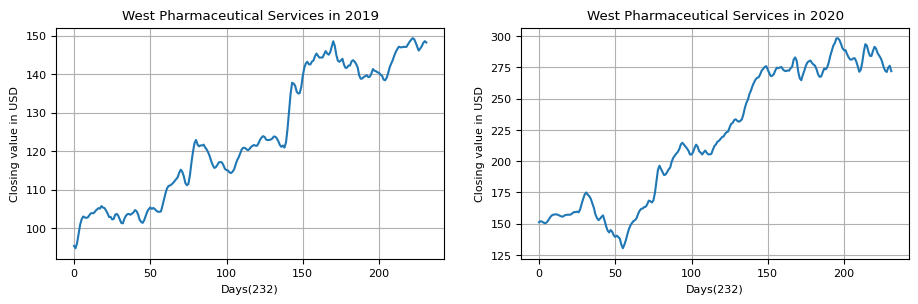

In [152]:
plot_curve_2('WST')

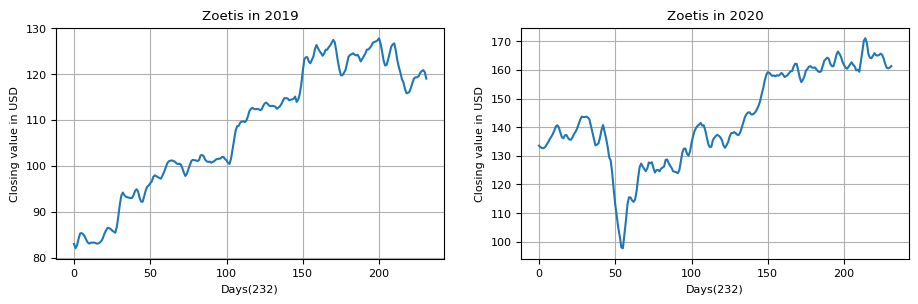

In [153]:
plot_curve_2('ZTS')

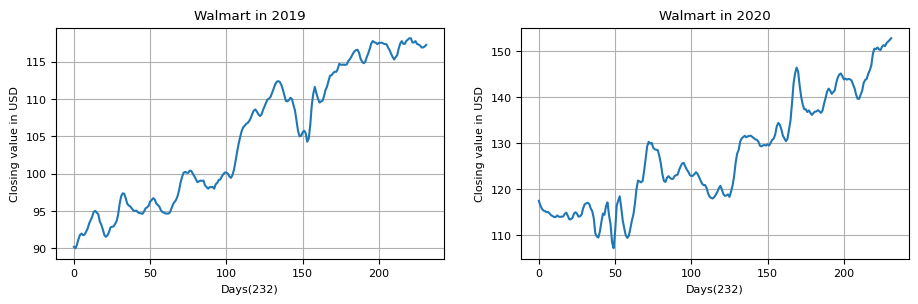

In [158]:
plot_curve_2('WMT')

# Companies that underwent a transition

<h3>Cluster Zero to One

* Due to the negative economic impacts of COVID it is obvious to expect that most companies would have experienced a decline in their closing values. 

* This point is validated in the results below. Number of companies that were underperforming in 2019 was <b>6</b>. Due to COVID there are now <b>139 Companies</b> underperforming companies! 

* The plots below show the companies that transitioned from Cluster Zero(low increase/decrease) to Cluster One(severe decline).

In [159]:
print(len(all_transitions['0 to 1']))

139


In [160]:
print(all_transitions['0 to 1'])

['AFL', 'ALK', 'ALLE', 'ALL', 'AAL', 'AXP', 'APA', 'AIV', 'AVB', 'BKR', 'BAC', 'BK', 'BA', 'BXP', 'COF', 'CCL', 'CBRE', 'CNP', 'CF', 'SCHW', 'CVX', 'CB', 'C', 'CFG', 'CMA', 'CXO', 'COP', 'DRI', 'DAL', 'XRAY', 'DVN', 'FANG', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DXC', 'EOG', 'ESS', 'RE', 'EXC', 'EXPE', 'XOM', 'FRT', 'FITB', 'FLIR', 'FLS', 'F', 'FOXA', 'FOX', 'BEN', 'IT', 'GD', 'GE', 'GL', 'GS', 'HAL', 'HCA', 'HES', 'HPE', 'HLT', 'HFC', 'HST', 'HPQ', 'HBAN', 'HII', 'IPG', 'IVZ', 'JPM', 'KEY', 'KMI', 'LW', 'LVS', 'LEG', 'LNC', 'LYV', 'L', 'LYB', 'MTB', 'MRO', 'MPC', 'MAR', 'MET', 'MGM', 'MHK', 'TAP', 'NOV', 'NTAP', 'NLSN', 'NTRS', 'NCLH', 'OXY', 'OMC', 'OKE', 'PBCT', 'PXD', 'PNC', 'PPL', 'PFG', 'PRU', 'PVH', 'RL', 'RJF', 'RTX', 'O', 'REG', 'RF', 'RCL', 'SLB', 'SPG', 'SLG', 'LUV', 'STT', 'SYF', 'SYY', 'TPR', 'FTI', 'TXT', 'TRV', 'TFC', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UAL', 'UHS', 'UNM', 'VLO', 'VTR', 'VFC', 'VIAC', 'VNO', 'WAB', 'WFC', 'WRK', 'WYNN', 'XRX', 'ZION']


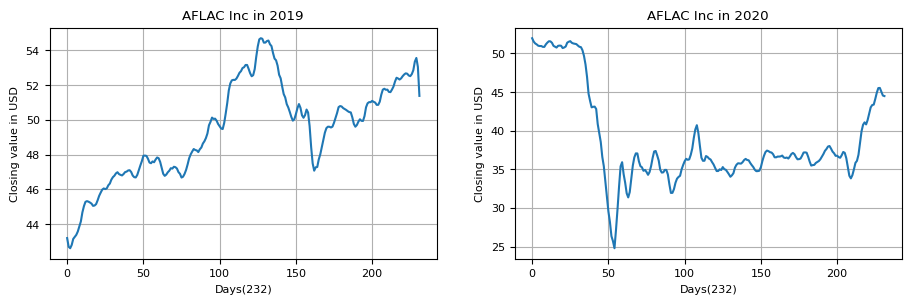

In [161]:
plot_curve_2('AFL')

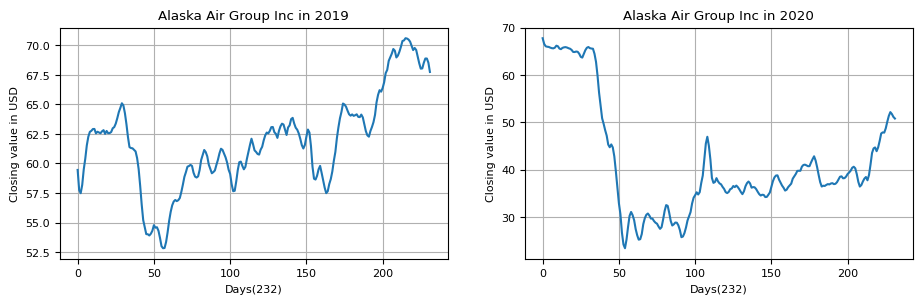

In [162]:
plot_curve_2('ALK')

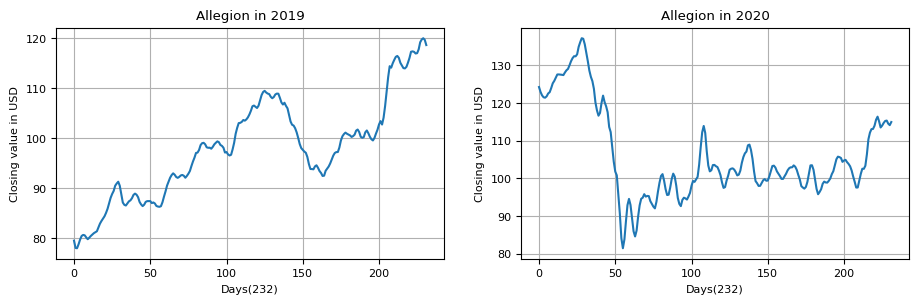

In [163]:
plot_curve_2('ALLE')

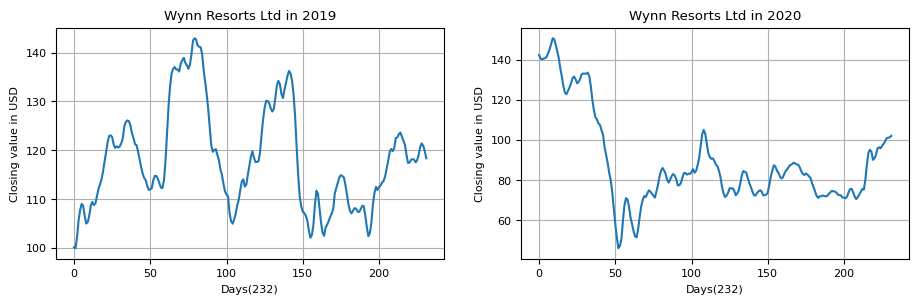

In [164]:
plot_curve_2('WYNN')

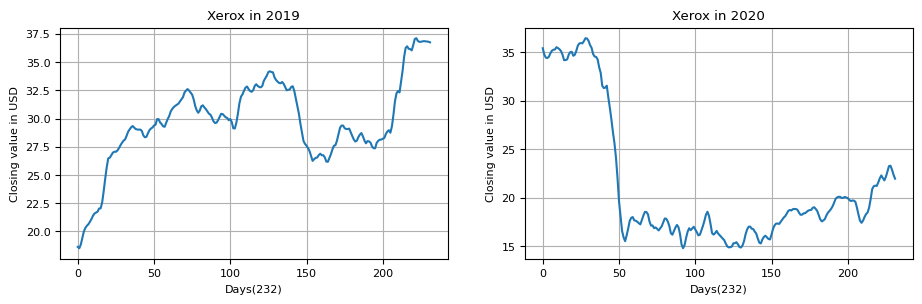

In [165]:
plot_curve_2('XRX')

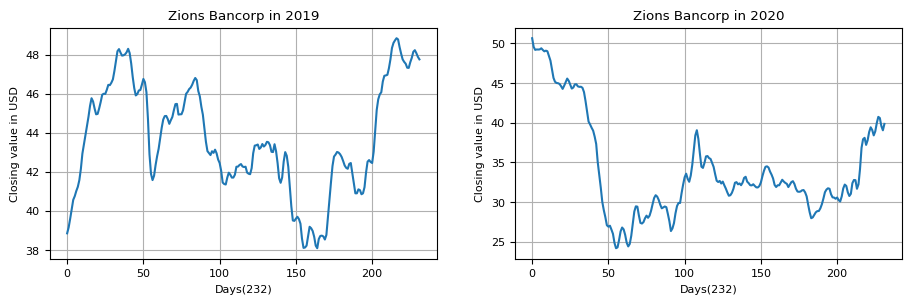

In [166]:
plot_curve_2('ZION')

<h3>Cluster Zero to Two

* The results below indicate that <b>160 companies</b> transitioned from a low increase/decrease category to a high performance category.

* Negative impact of COVID on these companies was minimal.

In [169]:
print(len(all_transitions['0 to 2']))

160


In [167]:
print(all_transitions['0 to 2'])

['MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'A', 'ALB', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMCR', 'AMP', 'AME', 'APH', 'ADI', 'AOS', 'APTV', 'ADM', 'AJG', 'ADSK', 'AZO', 'AVY', 'BBY', 'BLK', 'BKNG', 'BWA', 'AVGO', 'BR', 'CHRW', 'CDNS', 'CAT', 'CHD', 'CLX', 'CTSH', 'CL', 'CMCSA', 'CAG', 'STZ', 'GLW', 'CTVA', 'CSX', 'CMI', 'DHR', 'DVA', 'DE', 'DLTR', 'DPZ', 'DOV', 'DOW', 'DTE', 'DRE', 'DD', 'EMN', 'EBAY', 'EA', 'EMR', 'ETSY', 'EXPD', 'EXR', 'FB', 'FAST', 'FDX', 'FRC', 'FTV', 'FCX', 'GPS', 'GRMN', 'GM', 'GPC', 'GWW', 'HBI', 'HOLX', 'HON', 'HUM', 'IEX', 'ITW', 'IR', 'IP', 'INTU', 'ISRG', 'IPGP', 'IQV', 'JBHT', 'LB', 'LH', 'LEN', 'LIN', 'LKQ', 'LOW', 'MMC', 'MAS', 'MKC', 'MXIM', 'MCD', 'MTD', 'MCHP', 'MNST', 'MS', 'NDAQ', 'NFLX', 'NWSA', 'NWS', 'NKE', 'NSC', 'NUE', 'NVDA', 'ORLY', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PKI', 'PPG', 'PGR', 'PEG', 'PWR', 'DGX', 'REGN', 'RSG', 'RHI', 'ROK', 'ROL', 'ROP', 'CRM', 'SEE', 'NOW', 'SWKS', 'SNA', 'SWK', 'SYK', 'SIVB', 'TMUS', 'TROW', 'TE

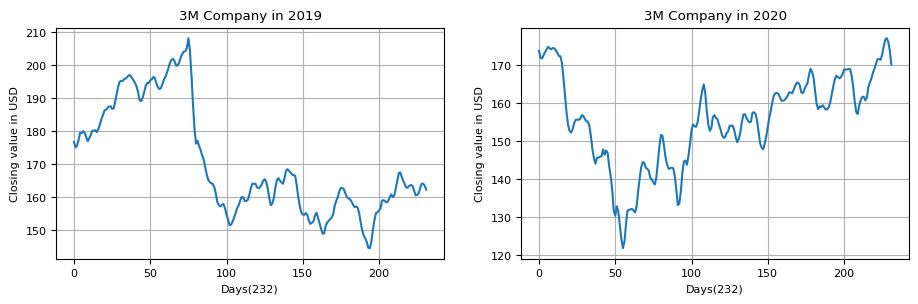

In [170]:
plot_curve_2('MMM')

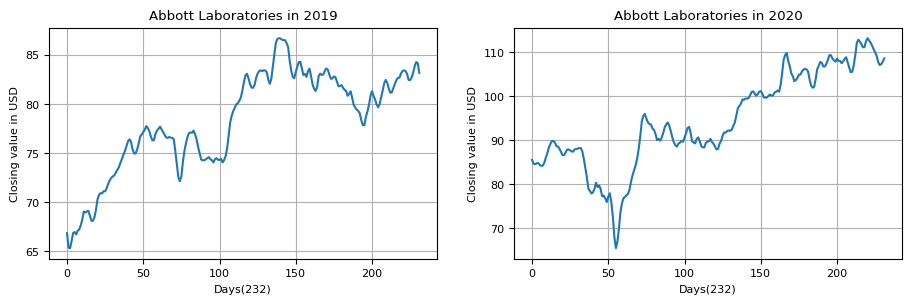

In [171]:
plot_curve_2('ABT')

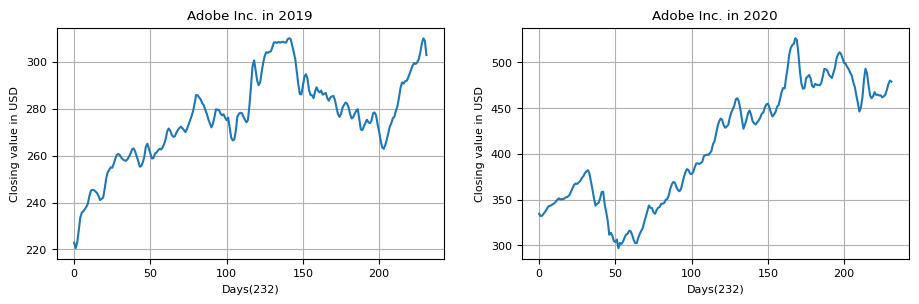

In [173]:
plot_curve_2('ADBE')

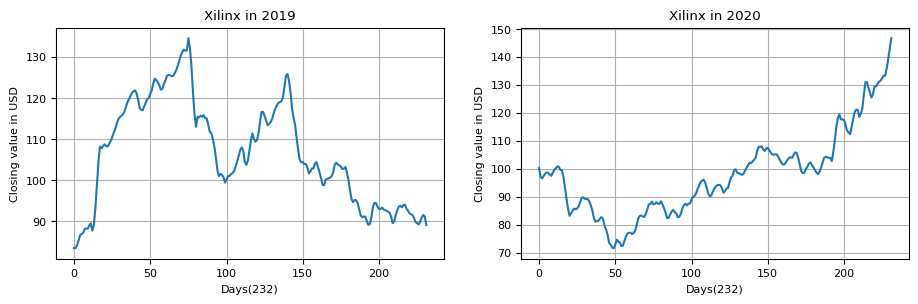

In [177]:
plot_curve_2('XLNX')

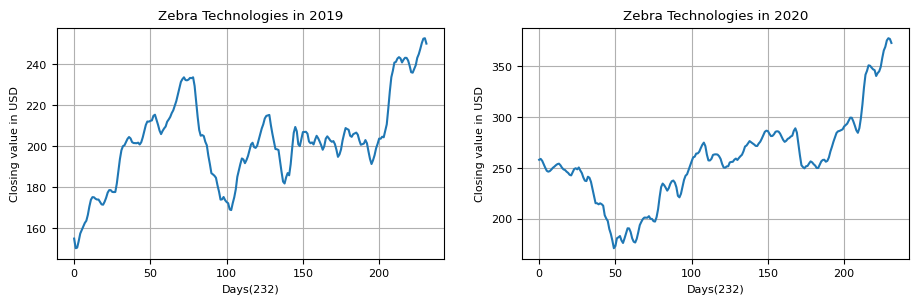

In [175]:
plot_curve_2('ZBRA')

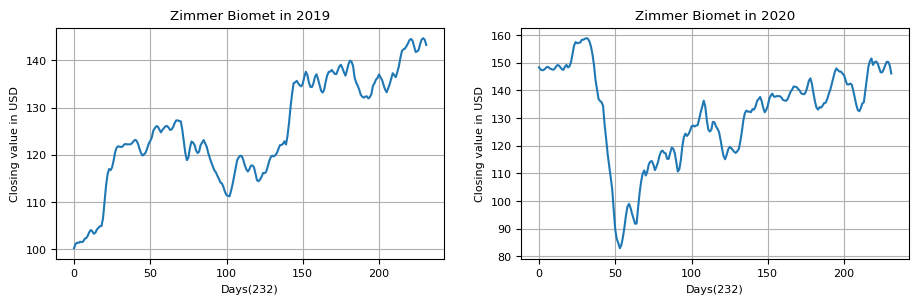

In [176]:
plot_curve_2('ZBH')

<h3>Cluster One to Zero

* Only one company transitioned from low to high closing values

In [178]:
print(len(all_transitions['1 to 0']))

1


In [179]:
print(all_transitions['1 to 0'])

['BIIB']


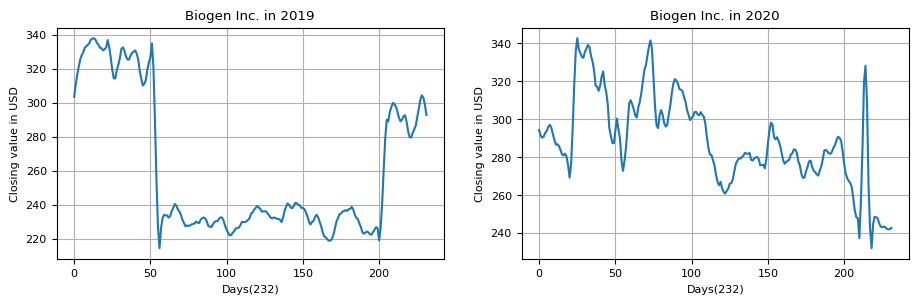

In [180]:
plot_curve_2('BIIB')

<h3>Cluster One to Two

* Companies that transitioned from a chronic low closing values to high closing values

In [181]:
print(all_transitions['1 to 2'])

['ABMD', 'KHC']


In [183]:
print(all_transitions['1 to 2'])

['ABMD', 'KHC']


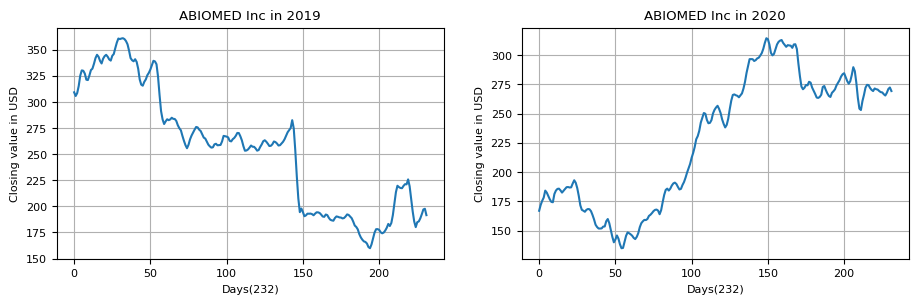

In [184]:
plot_curve_2('ABMD')

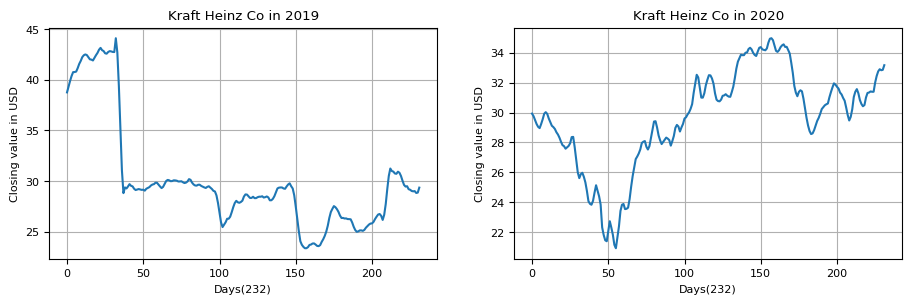

In [185]:
plot_curve_2('KHC')

<h3>Cluster Two to Zero

* <b>27 companies</b> transitioned from a state of having increasing closing values to a state of having decreasing closing values.

In [189]:
print(len(all_transitions['2 to 0']))

27


In [188]:
print(all_transitions['2 to 1'])

['AIG', 'T', 'CBOE', 'CINF', 'EIX', 'ETR', 'EQR', 'FE', 'FLT', 'HIG', 'HAS', 'PEAK', 'HWM', 'KIM', 'MLM', 'PSX', 'ROST', 'SRE', 'TDG', 'TSN', 'WRB', 'WELL', 'WDC', 'WU']


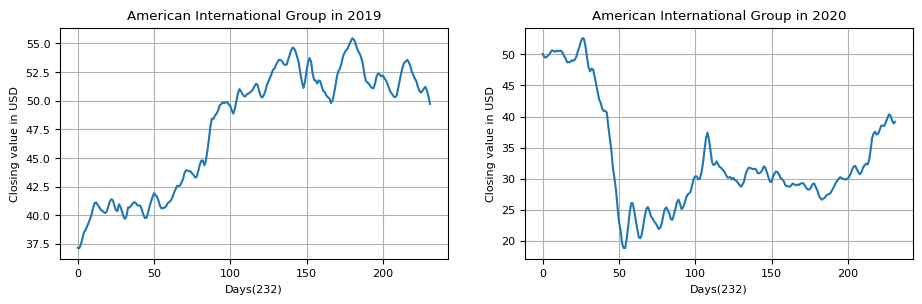

In [190]:
plot_curve_2('AIG')

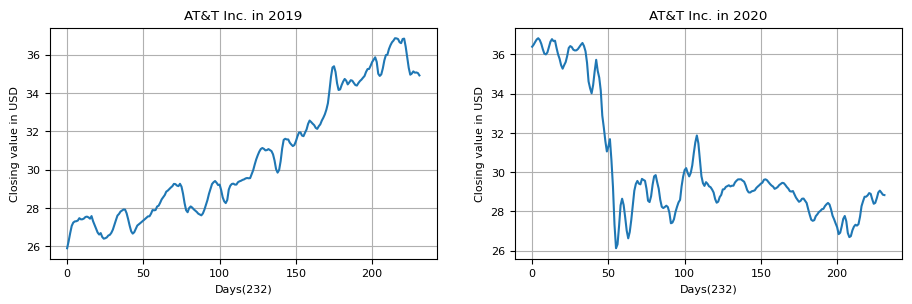

In [191]:
plot_curve_2('T')

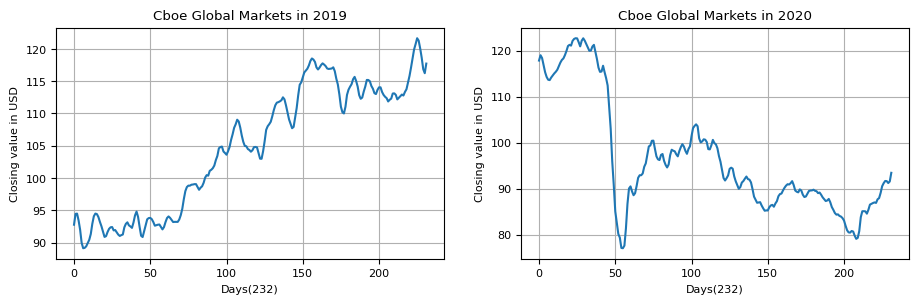

In [192]:
plot_curve_2('CBOE')

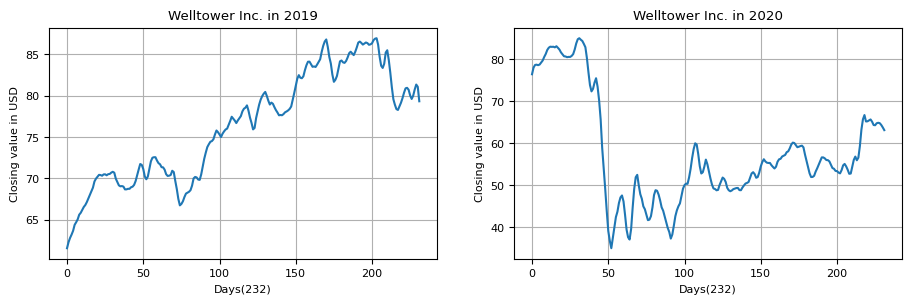

In [193]:
plot_curve_2('WELL')

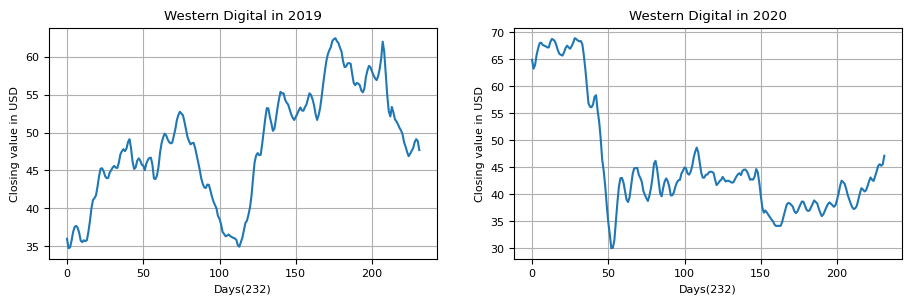

In [194]:
plot_curve_2('WDC')

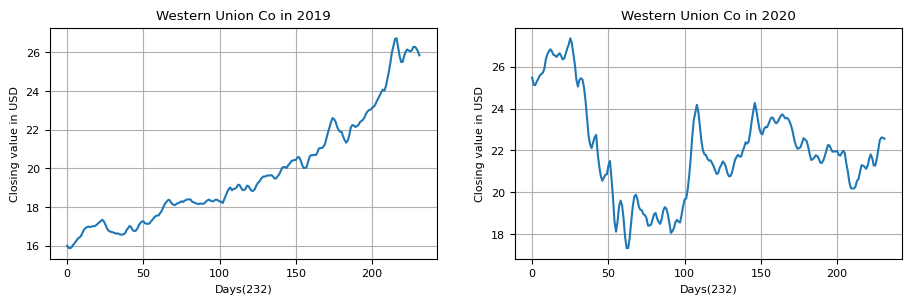

In [195]:
plot_curve_2('WU')

<h3>Cluster Two to One

* These companies had a very high rate of increase in closing values, because of COVID they were not able to continue on their current trajectory of growth.

In [196]:
print(len(all_transitions['2 to 1']))

24


In [197]:
print(all_transitions['2 to 0'])

['AKAM', 'AMT', 'CPB', 'CME', 'CMS', 'KO', 'CVS', 'ES', 'FIS', 'FISV', 'GPN', 'HSY', 'KEYS', 'LHX', 'LDOS', 'LMT', 'MCK', 'MDT', 'MAA', 'MSI', 'NOC', 'SBAC', 'STX', 'SO', 'TDY', 'TFX', 'WEC']


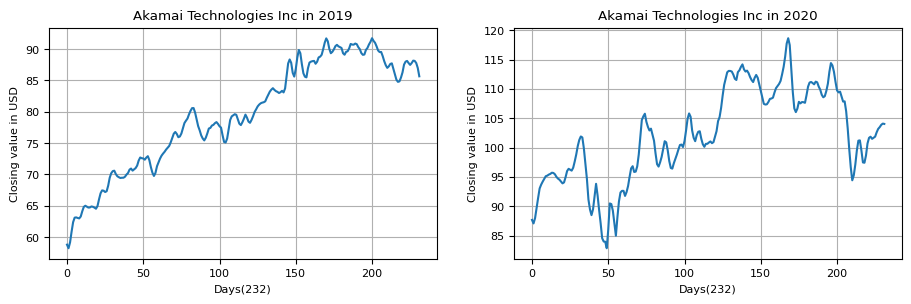

In [198]:
plot_curve_2('AKAM')

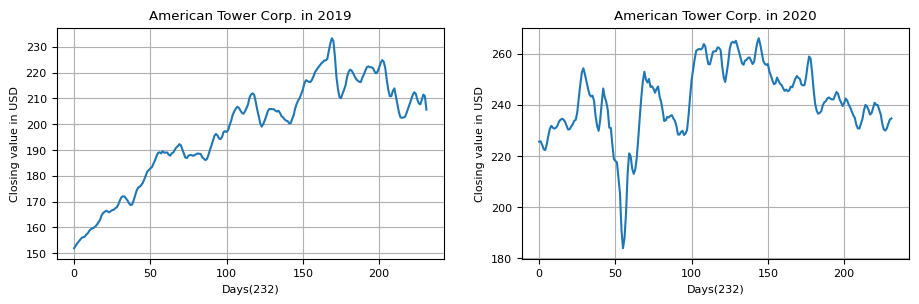

In [199]:
plot_curve_2('AMT')

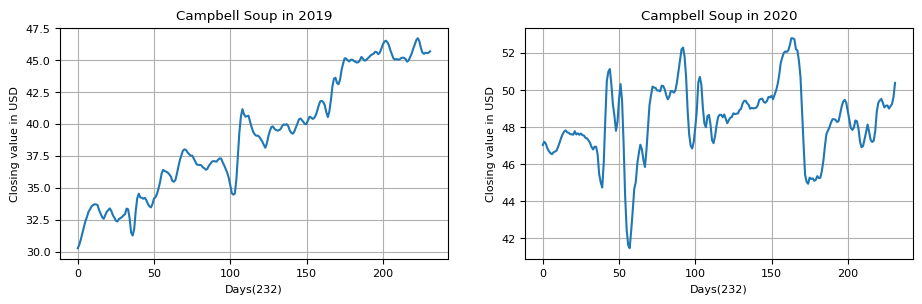

In [200]:
plot_curve_2('CPB')

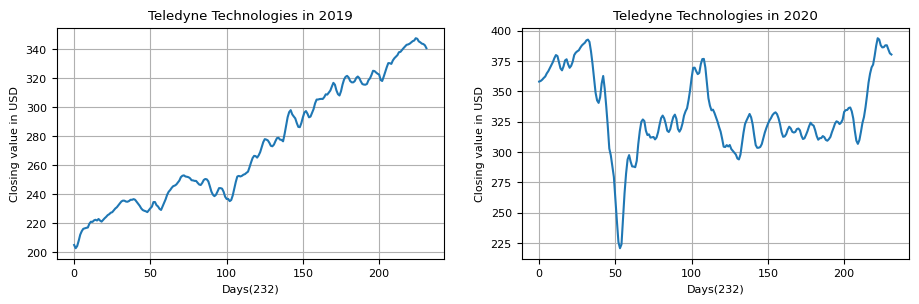

In [201]:
plot_curve_2('TDY')

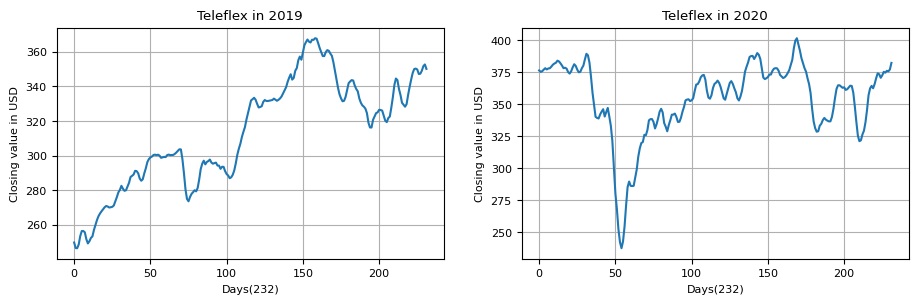

In [202]:
plot_curve_2('TFX')

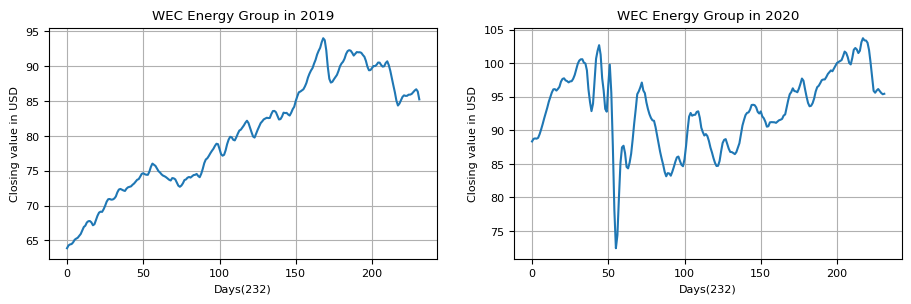

In [203]:
plot_curve_2('WEC')